# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [1]:
# Get the datasets
!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt


['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '100 11645  100 11645    0     0  28174      0 --:--:-- --:--:-- --:--:-- 28264']

In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [21]:
import math
import itertools
import re

def read_data(file_name, expected_len=None):
    data = []
    with open(file_name, 'r') as f:
        header = f.readline().strip()
        # Use tab as delimiter if found in the header; otherwise, split on whitespace.
        delimiter = "\t" if "\t" in header else None
        for line in f:
            line = line.strip()
            if not line:
                continue
            # Split the line using the appropriate delimiter.
            tokens = line.split(delimiter) if delimiter is not None else line.split()
            if len(tokens) < 2:  # Skip lines with too few tokens
                continue
            try:
                inst = list(map(int, tokens))
            except ValueError:
                continue  # Skip lines that cannot be parsed as integers
            # Remove existing bias if present
            if inst[0] == -1:
                inst = inst[1:]
            # Add our bias term
            inst = [-1] + inst
            # Pad missing features if expected_len is provided (insert 0 before the label)
            if expected_len is not None:
                while len(inst) < expected_len:
                    inst.insert(-1, 0)
            data.append(inst)
    return data

def dot_product(a, b):
    s = 0
    for i in range(len(a)):
        s = s + a[i] * b[i]
    return s

def sigmoid(x):
    y = 1 + math.exp(-x)
    z = 1 / y
    return z

def output(w, inst):
    return sigmoid(dot_product(w, inst[:-1]))

def predict(w, inst):
    o = output(w, inst)
    return 1 if o >= 0.5 else 0

def get_accuracy(w, insts):
    correct = 0
    for inst in insts:
        if predict(w, inst) == inst[-1]:
            correct += 1
    return correct * 100 / len(insts)

def train_perceptron(insts, lr, epochs):
    w = [0] * (len(insts[0]) - 1)
    for _ in range(epochs):
        for inst in insts:
            in_val = dot_product(w, inst[:-1])
            out_val = sigmoid(in_val)
            err = inst[-1] - out_val
            for i in range(len(w)):
                w[i] = w[i] + lr * err * out_val * (1 - out_val) * inst[i]
    return w


## Run it

In [22]:
instances_tr = read_data("train.dat")
expected_len = len(instances_tr[0])
instances_te = read_data("test.dat", expected_len)

lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

# Demonstration: Show the difference between using the continuous sigmoid output and the thresholded prediction.
sample_instance = instances_tr[0]
sample_continuous = output(weights, sample_instance)
sample_thresholded = predict(weights, sample_instance)

print("\nDemonstration of outputs on a sample instance:")
print(f"Continuous sigmoid output: {sample_continuous:.4f}")
print(f"Thresholded prediction: {sample_thresholded}")


#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4

Demonstration of outputs on a sample instance:
Continuous sigmoid output: 0.3669
Thresholded prediction: 0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)
We use the raw output from the sigmoid function because it gives us a smooth number between 0 and 1. This number shows how sure the model is about its prediction. Here is the simple code:

def sigmoid(x):
    y = 1 + math.exp(-x)
    z = 1 / y
    return z

in_value = dot_product(weights, instance[:-1])
output = sigmoid(in_value)
error = instance[-1] - output

This code gives a continuous value. For example, in our demo we got:


Demonstration of outputs on a sample instance:
Continuous sigmoid output: 0.3669
Thresholded prediction: 0

When we use the continuous output (0.3669), it keeps the detail of how close the value is to 0 or 1. But if we use the predict function, it changes the number into just 0 or 1. In our demo, the continuous value 0.3669 becomes 0 after thresholding.

This small detail (0.3669) is important because it tells us exactly how much to adjust the weights during training. Without it, the model would not learn as well.




### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) :
When we use only a few training examples (like 20 or 40), the model always gets about 71.4% accuracy. This means the model does not learn much from such little data. With very small data, even if we change the number of training rounds (epochs) or the learning speed (learning rate), the result stays almost the same.

When we use more training examples (like 200 or 300), sometimes the model gets better accuracy. For example, with 200 or 300 examples and training for 100 rounds at a learning rate of 0.005, the accuracy improves to 85.7%. This shows that having more examples can help the model learn better if we train long enough.

However, the learning rate is very important. If the learning rate is too high (like 0.010 or 0.050), the model sometimes does very badly (accuracy drops to 28.6%). A high learning rate can change the weights too much and cause the model to learn in the wrong way. In short, we need the right balance of training examples, training rounds, and learning speed to get the best performance.


In [24]:
instances_tr = read_data("train.dat")
expected_len = len(instances_tr[0])
instances_te = read_data("test.dat", expected_len)

tr_percent = [5, 10, 25, 50, 75, 100]   # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]         # number of epochs
lr_array = [0.005, 0.01, 0.05]            # learning rate

for lr in lr_array:
    for tr_size in tr_percent:
        size = round(len(instances_tr) * tr_size / 100)
        pre_instances = instances_tr[:size]
        for epochs in num_epochs:
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            print(f"# tr: {size:3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")


# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  40, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  40, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  40, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  40, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 100, epoch

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)

**A)**  
From the plots, it is clear that *using the entire training set (100%)* is *not always required* to achieve the *highest* accuracy.  In several cases, a *subset* of the training set (e.g. 50% or 75%) combined with a suitable learning rate and sufficient epochs attains an accuracy on par with or *better* than using 100%.  Although larger training sizes *often* help, the final outcome depends strongly on how well the other hyperparameters (learning rate and number of epochs) are tuned.



**B)**  
We can also see from the plots and raw accuracy numbers that in some cases, *adding more data* can *lower* the test accuracy.  This might happen if the *learning rate* is *too high*, causing the training to overshoot and fail to converge when exposed to more diverse (or even noisier) examples.  Alternatively, if the data has conflicting signals, a perceptron with fixed hyperparameters might not fully learn the underlying pattern and “spread out” its updates in a harmful way.  Thus, *more data* is *not* automatically beneficial unless all hyperparameters are well matched to the data.



**C)**  
Yes—some of the plots clearly show accuracies of around *85.7%*, so it *is* possible to surpass *80%* accuracy with the right combination of learning rate (for instance, 0.05) and enough epochs (e.g., 50 or 100), plus a sufficiently large portion of the training set (200 or 300 examples).  With these settings, the perceptron converges to a better decision boundary, pushing accuracy above 80%.



**D)**  
From the plots, it is also apparent that simply *increasing* the number of epochs does *not* guarantee higher accuracy.  In some scenarios, going from 50 epochs to 100 epochs helps the model converge further; in others, it causes the performance to worsen, especially if the learning rate is *too large*.  Essentially, if the step sizes (learning rate) are *not* appropriate, more epochs can reinforce bad weight updates or oscillations.  Therefore, while *longer training* can help in the *right* conditions, it is *not* automatically beneficial without tuning the other hyperparameters.


Hyperparameter Grid Search Results:
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  40, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  40, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  40, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  40, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 

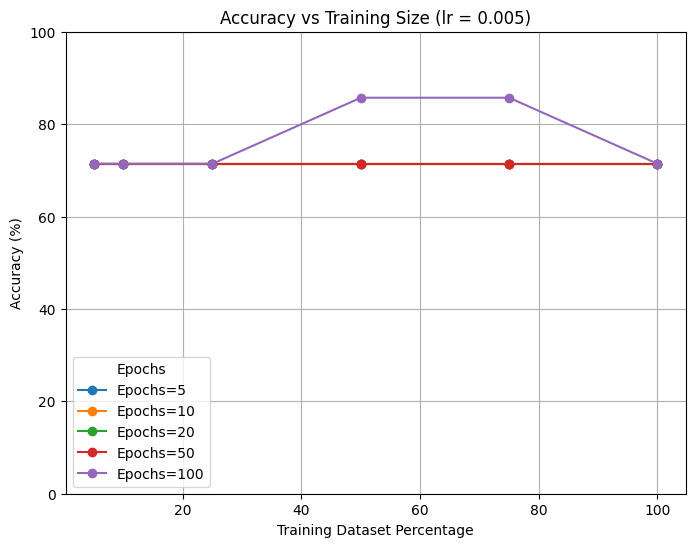

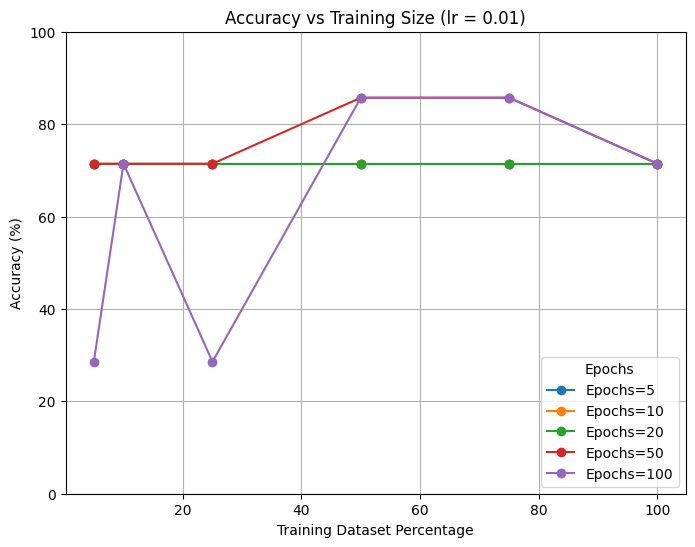

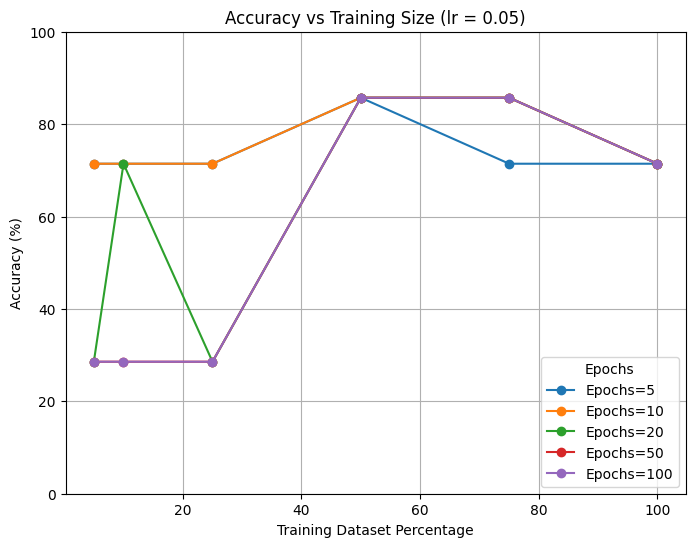

In [25]:
# Load the datasets
instances_tr = read_data("train.dat")
expected_len = len(instances_tr[0])
instances_te = read_data("test.dat", expected_len)

# Hyperparameter settings
tr_percent = [5, 10, 25, 50, 75, 100]   # percent of the training dataset to use
num_epochs = [5, 10, 20, 50, 100]         # number of training epochs
lr_array = [0.005, 0.01, 0.05]            # learning rates

results = []  # list to store the results for each combination

print("Hyperparameter Grid Search Results:")
for lr in lr_array:
    for tr_pct in tr_percent:
        size = round(len(instances_tr) * tr_pct / 100)
        sub_train = instances_tr[:size]
        for epochs in num_epochs:
            weights = train_perceptron(sub_train, lr, epochs)
            acc = get_accuracy(weights, instances_te)
            results.append({
                "tr_pct": tr_pct,
                "tr_size": size,
                "epochs": epochs,
                "lr": lr,
                "accuracy": acc
            })
            print(f"# tr: {size:3}, epochs: {epochs:3}, learning rate: {lr:.3f}; Accuracy (test, {len(instances_te)} instances): {acc:.1f}")

# Plotting the results
import matplotlib.pyplot as plt

# For each learning rate, create a plot showing how accuracy changes with training data percentage.
for lr in lr_array:
    plt.figure(figsize=(8, 6))
    for epochs in num_epochs:
         # Filter results for this learning rate and number of epochs
         xs = [r["tr_pct"] for r in results if r["lr"] == lr and r["epochs"] == epochs]
         ys = [r["accuracy"] for r in results if r["lr"] == lr and r["epochs"] == epochs]
         plt.plot(xs, ys, marker='o', label=f"Epochs={epochs}")
    plt.xlabel("Training Dataset Percentage")
    plt.ylabel("Accuracy (%)")
    plt.title(f"Accuracy vs Training Size (lr = {lr})")
    plt.legend(title="Epochs")
    plt.ylim(0, 100)
    plt.grid(True)
    plt.show()
